In [21]:
import pandas as np
import numpy as np
# import tensorflow as tf
# import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from datetime import timedelta
import pandas as pd
import talib
import warnings
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import seaborn as sns


warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
data = yf.download("GOOG AMZN JPM GME XOM SPY", start="2000-01-01", end="2023-11-30", interval="1d")

close = data["Close"]
returns = np.log(close).diff().dropna()

[*********************100%***********************]  6 of 6 completed


In [3]:
returns

,AMZN,GME,GOOG,JPM,SPY,XOM
Date,,,,,,
2004-08-20,0.022525,-0.008785,0.076433,0.016961,0.006994,0.003542
2004-08-23,-0.001520,-0.016010,0.010013,-0.002591,-0.002538,-0.005762
2004-08-24,-0.010191,0.013654,-0.042289,0.001037,0.001360,-0.003117
2004-08-25,0.031509,0.002356,0.010717,0.021787,0.006774,0.007552
2004-08-26,-0.002733,-0.007676,0.017859,0.000254,0.000000,0.001327
...,...,...,...,...,...,...
2023-11-22,0.019339,-0.020935,0.010049,0.002351,0.003853,-0.004317
2023-11-24,0.000204,-0.007350,-0.012939,0.001369,0.000615,0.005370
2023-11-27,0.006724,-0.024058,-0.001231,-0.002282,-0.001803,-0.005850


In [6]:
rolling_corrs = returns.rolling(40).corr()

In [14]:
data = rolling_corrs.dropna()["SPY"].unstack()[['GOOG','AMZN','JPM','GME','XOM']]

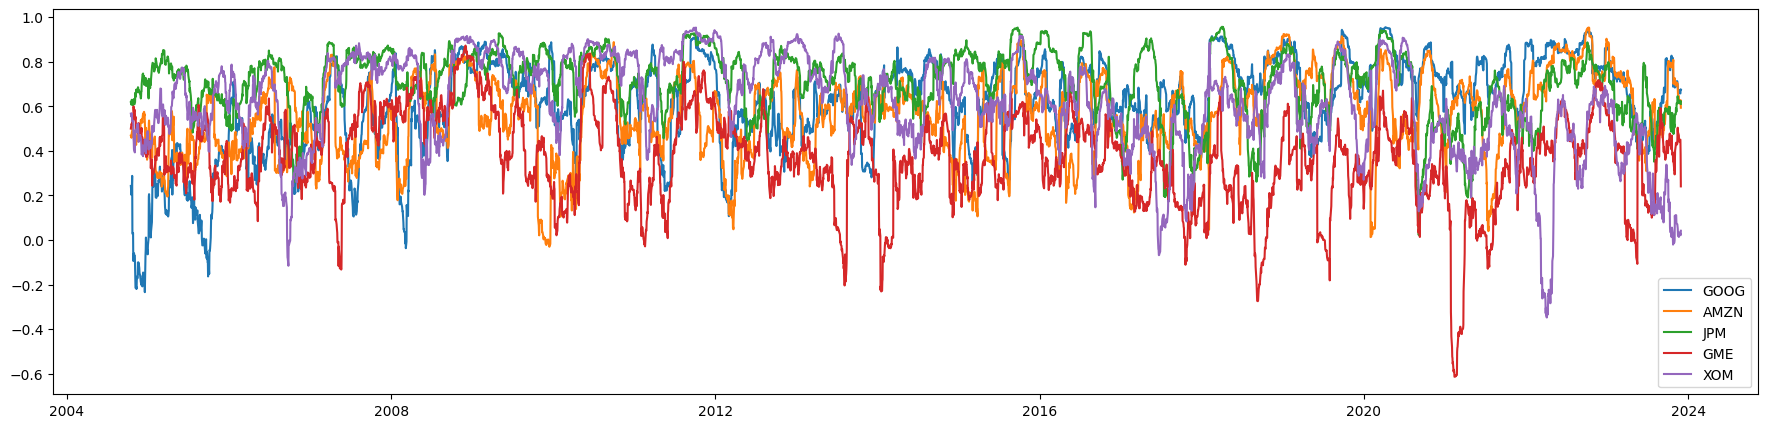

In [19]:
plt.figure(figsize = (22,5))
plt.plot(data)
plt.legend(data.columns)
plt.show()

<Axes: >

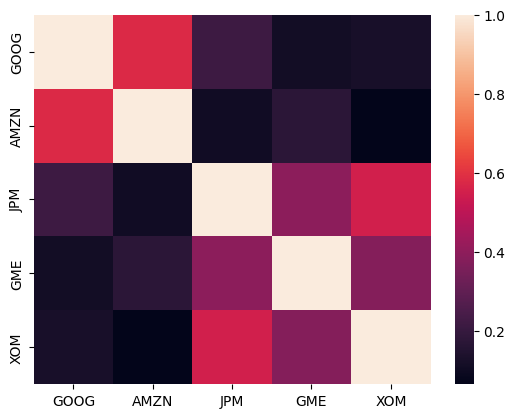

In [22]:
sns.heatmap(data.dropna().corr('spearman'))

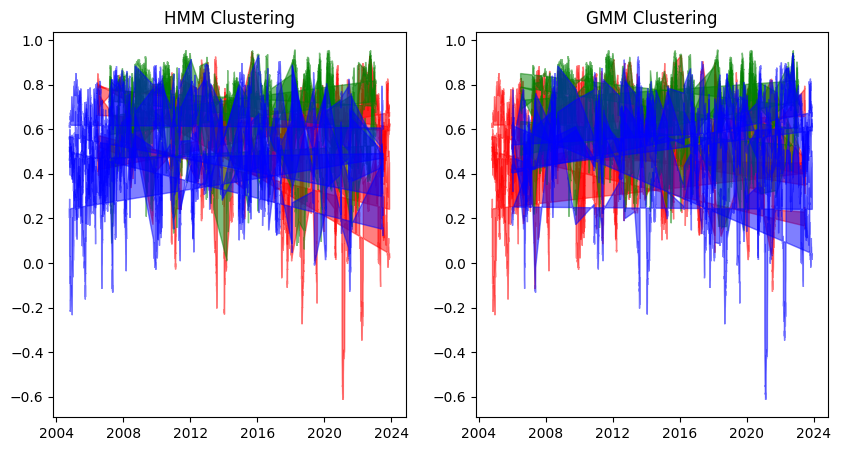

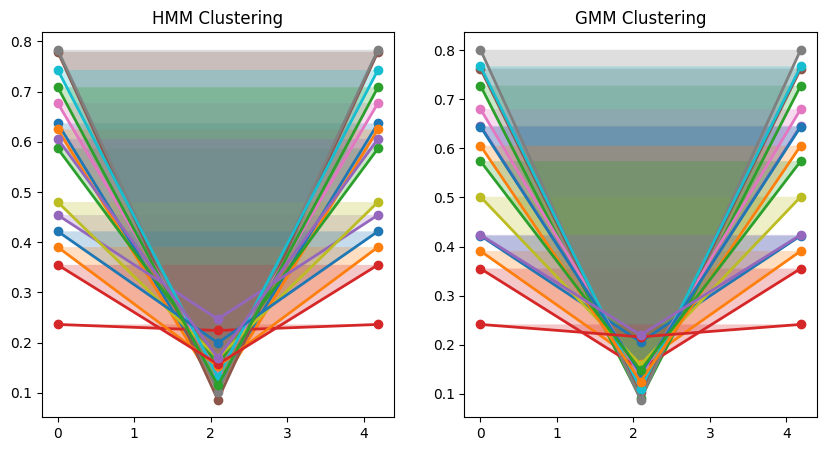

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from hmmlearn import hmm
from sklearn import metrics

# 加载数据
# sc = StandardScaler()
# data = sc.fit_transform(Generate_SH_signal(df).dropna())


# HMM聚类
model_hmm = hmm.GaussianHMM(n_components=3, covariance_type="full")
model_hmm.fit(data)
labels_hmm = model_hmm.predict(data)

# GMM聚类
model_gmm = GaussianMixture(n_components=3)
model_gmm.fit(data)
labels_gmm = model_gmm.predict(data)

# 计算AIC和BIC
aic_hmm = model_hmm.aic(data)
bic_hmm = model_hmm.bic(data)
aic_gmm = model_gmm.aic(data)
bic_gmm = model_gmm.bic(data)

# 绘制结果
plt.figure(figsize=(10, 5))
plt.subplot(121)
for i, color in zip(range(3), ['red', 'green', 'blue']):
    plt.fill(data[labels_hmm==i], color=color, alpha=0.5)
plt.title('HMM Clustering')

plt.subplot(122)
for i, color in zip(range(3), ['red', 'green', 'blue']):
    plt.fill(data[labels_gmm==i], color=color, alpha=0.5)
plt.title('GMM Clustering')

plt.show()

# 计算均值和方差
mean_hmm = np.array([data[labels_hmm==i].mean() for i in range(3)])
std_hmm = np.array([data[labels_hmm==i].std() for i in range(3)])
mean_gmm = np.array([data[labels_gmm==i].mean() for i in range(3)])
std_gmm = np.array([data[labels_gmm==i].std() for i in range(3)])

# 绘制雷达图
angles=np.linspace(0, 2*np.pi, 3, endpoint=False).tolist()
plt.figure(figsize=(10, 5))

plt.subplot(121)
for i in range(3):
    stats = [mean_hmm[i], std_hmm[i]]
    stats = np.concatenate((stats,[stats[0]]))
    plt.polar(angles, stats, 'o-', linewidth=2)
    plt.fill(angles, stats, alpha=0.25)
plt.title('HMM Clustering')

plt.subplot(122)
for i in range(3):
    stats = [mean_gmm[i], std_gmm[i]]
    stats = np.concatenate((stats,[stats[0]]))
    plt.polar(angles, stats, 'o-', linewidth=2)
    plt.fill(angles, stats, alpha=0.25)
plt.title('GMM Clustering')

plt.show()


In [32]:
n_components = 3  # 假设有3个隐藏状态
model = hmm.GaussianHMM(n_components=n_components, covariance_type="full")
model.fit(data)

# 预测未来两个月的市场状态
# 注意：这里的预测需要根据模型和问题的具体情况进行调整
future_states = model.predict(data) 

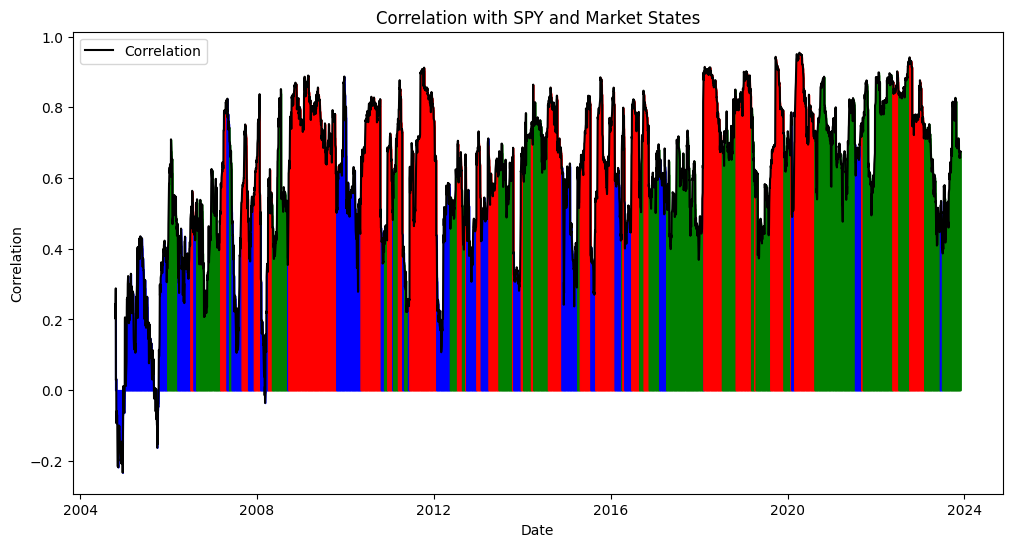

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设data是一个Pandas DataFrame，包含日期和相关系数
# 假设states是HMM模型预测的状态序列

# 将状态添加到数据中
data['State'] = future_states

# 创建颜色映射，每个状态一个颜色
state_colors = {0: 'red', 1: 'blue', 2: 'green'}  # 根据你的状态数量调整

# 绘图
plt.figure(figsize=(12, 6))

# 先绘制原始的相关系数曲线
plt.plot(data.index, data['GOOG'], label='Correlation', color='black')

# 然后填充状态颜色
for i in range(len(data) - 1):
    plt.fill_between(data.index[i:i+2], 0, data['GOOG'][i:i+2], 
                     color=state_colors[data['State'][i]], alpha=0.6)

plt.title('Correlation with SPY and Market States')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()


In [36]:
data['State'] = future_states

In [37]:
data

,GOOG,AMZN,JPM,GME,XOM,State
Date,,,,,,
2004-10-15,0.242740,0.468414,0.618027,0.499972,0.566963,1
2004-10-18,0.202020,0.458587,0.606885,0.520308,0.553242,1
2004-10-19,0.222821,0.479926,0.629002,0.522190,0.567221,1
2004-10-20,0.249785,0.482703,0.619159,0.516841,0.556361,1
2004-10-21,0.287859,0.480559,0.617326,0.532868,0.534719,1
...,...,...,...,...,...,...
2023-11-22,0.664385,0.613024,0.617796,0.445040,0.033624,2
2023-11-24,0.659970,0.617515,0.615004,0.450394,0.034056,2
2023-11-27,0.657649,0.619831,0.621619,0.450117,0.026650,2
